In [1]:
import pandas as pd
import numpy as np

In [5]:
db = pd.read_csv(r"C:\Users\laksh\NIDS_Prediction\Total_CSVs\NIDS_Dataset.csv")

In [6]:
db.head()

,Unnamed: 0,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,0,1,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,1,0,0,0,0,0,0,1,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,2,0,0,0,0,0,0,1,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,3,0,0,0,0,0,0,1,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,4,0,0,0,0,0,0,1,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign


In [9]:
db.dtypes

Unnamed: 0                int64
ip_1                      int64
ip_144                    int64
ip_204                    int64
ip_205                    int64
ip_207                    int64
ip_8                      int64
not_freq                  int64
ip_4                      int64
ip_11                     int64
dest_ip_130_1_8           int64
not_dest_freq             int64
Wrong_port                int64
port_is_443               int64
Wrong_port.1              int64
destination_port_443      int64
Duration                float64
fs_1807                   int64
fs_more                   int64
fsless                    int64
FlowSentRate            float64
FlowRecvRate            float64
Pcket_lenVar            float64
Length_std              float64
Length_mean             float64
L_median                float64
L_mode                  float64
s_median                float64
s_mode                  float64
PLCV                    float64
PTV                     float64
PT_std  

In [10]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [11]:
db = db.iloc[:,1:46]
db = db.iloc[:,0:45]
db

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,0,0,0,0,0,0,1,0,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,0,0,0,0,0,0,1,0,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,0,0,0,0,0,0,1,0,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,0,0,0,0,0,0,1,0,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881,Malicious
269639,1,0,0,0,0,0,0,0,0,0,...,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549,Malicious
269640,1,0,0,0,0,0,0,0,0,0,...,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937,Malicious
269641,1,0,0,0,0,0,0,0,0,0,...,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511,Malicious


In [12]:
x1 = db.iloc[:,0:45]
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,0,0,0,0,0,0,1,0,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,0,0,0,0,0,0,1,0,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,0,0,0,0,0,0,1,0,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,0,0,0,0,0,0,1,0,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881,Malicious
269639,1,0,0,0,0,0,0,0,0,0,...,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549,Malicious
269640,1,0,0,0,0,0,0,0,0,0,...,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937,Malicious
269641,1,0,0,0,0,0,0,0,0,0,...,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511,Malicious


In [13]:
x1 = db.iloc[:,0:44]
y1 = db.iloc[:,44]
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time
0,0,0,0,0,0,0,1,0,0,0,...,1.562871,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178
1,0,0,0,0,0,0,1,0,0,0,...,-2.909475,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056
2,0,0,0,0,0,0,1,0,0,0,...,-0.381118,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369
3,0,0,0,0,0,0,1,0,0,0,...,0.617898,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256
4,0,0,0,0,0,0,1,0,0,0,...,0.428250,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,-0.616616,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881
269639,1,0,0,0,0,0,0,0,0,0,...,1.499615,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549
269640,1,0,0,0,0,0,0,0,0,0,...,-0.889490,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937
269641,1,0,0,0,0,0,0,0,0,0,...,-0.665595,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511


In [14]:
np.isnan(x1).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [15]:
y1.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Benign, dtype: object

In [16]:
from collections import Counter

print(Counter(y1))

Counter({'Malicious': 249836, 'Benign': 19807})


In [17]:
c_class_0, c_class_1 = db.Benign.value_counts()
c_class_0, c_class_1 = db.Benign.value_counts()

In [18]:
print(c_class_0)
print(c_class_1)

249836
19807


In [19]:
df_c_0 = db[db['Benign'] == 'Malicious']
df_c_1 = db[db['Benign'] == 'Benign']

In [20]:
df_c_0_under = df_c_0.sample(c_class_1)

In [21]:
df_under = pd.concat([df_c_0_under, df_c_1], axis=0)

In [22]:
print(df_under.Benign.value_counts())

Malicious    19807
Benign       19807
Name: Benign, dtype: int64


In [23]:
df_Totoal = df_under

In [24]:
df_Totoal.head()

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
28717,0,0,1,0,0,0,0,0,1,0,...,-0.908148,-0.175016,-0.097587,-0.209217,-0.218068,-0.148272,0.830801,-0.260500,0.272859,Malicious
161479,1,0,0,0,0,0,0,0,0,0,...,-0.568837,-0.171783,-0.044157,-0.186180,-0.218043,-0.159625,1.081360,-0.083838,0.102484,Malicious
20996,0,0,0,0,0,0,1,0,0,0,...,-0.915804,-0.152559,0.145286,-0.096250,-0.226443,-0.159628,1.589586,0.057987,-0.080636,Malicious
123368,0,0,0,0,0,0,1,0,0,0,...,-0.944319,-0.178790,-0.219826,-0.229879,-0.218018,-0.148208,0.754305,-0.291898,-0.187349,Malicious
72690,1,0,0,0,0,0,0,0,0,0,...,0.882851,-0.178940,-0.244166,-0.240157,-0.221582,-0.159607,-0.854032,0.437700,-0.303518,Malicious


In [25]:
x = df_Totoal.iloc[:,0:44]
y = df_Totoal.iloc[:,44]

In [26]:
np.isnan(x).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [28]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [29]:
x_train.shape

(31691, 44)

In [30]:
cvscores = []
i=0
for train, test in kfold.split(x_train, y_train):
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(44,1)))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation="sigmoid"))
    # define optimizer and objective, compile cnn


    cnn.compile(loss="binary_crossentropy", optimizer="RMSprop",metrics=['accuracy'])
    
    
    x_tn = x_train.iloc[train]
    y_tn = y_train.iloc[train]
    y_tn = pd.get_dummies(y_tn)
    x_ts = x_train.iloc[test]
    y_ts = y_train.iloc[test]
    y_ts = pd.get_dummies(y_ts)
    
    x_tn1 = x_tn.to_numpy()
    x_tn1 = np.reshape(x_tn1, (x_tn1.shape[0],x_tn1.shape[1],1))
    
    
    x_ts1 = x_ts.to_numpy()
    x_ts1 = np.reshape(x_ts1, (x_ts1.shape[0],x_ts1.shape[1],1))
    
    cnn.fit(x_tn1, y_tn, epochs=50,batch_size=64,verbose=1)
    scores = cnn.evaluate(x_ts1, y_ts, verbose=1)
    print(str(i)+"th Fold :")
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    i = i+1
    print("------------------------------------------------------------------")


print("Average validation accuracy : ")   
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/50
446/446 [==============================] - 3s 5ms/step - loss: 0.2118 - accuracy: 0.9243
Epoch 2/50
446/446 [==============================] - 3s 6ms/step - loss: 0.1528 - accuracy: 0.9442
Epoch 3/50
446/446 [==============================] - 3s 7ms/step - loss: 0.1508 - accuracy: 0.9453
Epoch 4/50
446/446 [==============================] - 3s 7ms/step - loss: 0.1471 - accuracy: 0.9453
Epoch 5/50
446/446 [==============================] - 5s 11ms/step - loss: 0.1457 - accuracy: 0.9459
Epoch 6/50
446/446 [==============================] - 4s 8ms/step - loss: 0.1454 - accuracy: 0.9468
Epoch 7/50
446/446 [==============================] - 3s 7ms/step - loss: 0.1441 - accuracy: 0.9454
Epoch 8/50
446/446 [==============================] - 3s 6ms/step - loss: 0.1420 - accuracy: 0.9473
Epoch 9/50
446/446 [==============================] - 3s 7ms/step - loss: 0.1425 - accuracy: 0.9472
Epoch 10/50
446/446 [==============================] - 2s 5ms/step - loss: 0.1428 - accuracy: 0.947

446/446 [==============================] - 2s 5ms/step - loss: 0.1430 - accuracy: 0.9461
Epoch 31/50
446/446 [==============================] - 2s 5ms/step - loss: 0.1440 - accuracy: 0.9445
Epoch 32/50
446/446 [==============================] - 2s 5ms/step - loss: 0.1430 - accuracy: 0.9474
Epoch 33/50
446/446 [==============================] - 2s 5ms/step - loss: 0.1448 - accuracy: 0.9462
Epoch 34/50
446/446 [==============================] - 2s 5ms/step - loss: 0.1444 - accuracy: 0.9466
Epoch 35/50
446/446 [==============================] - 2s 5ms/step - loss: 0.1438 - accuracy: 0.9464
Epoch 36/50
446/446 [==============================] - 2s 5ms/step - loss: 0.1433 - accuracy: 0.9461
Epoch 37/50
446/446 [==============================] - 2s 5ms/step - loss: 0.1442 - accuracy: 0.9462
Epoch 38/50
446/446 [==============================] - 2s 5ms/step - loss: 0.1438 - accuracy: 0.9464
Epoch 39/50
446/446 [==============================] - 2s 6ms/step - loss: 0.1437 - accuracy: 0.9456
Ep

446/446 [==============================] - 2s 4ms/step - loss: 0.1448 - accuracy: 0.9464
Epoch 8/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1430 - accuracy: 0.9480
Epoch 9/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1446 - accuracy: 0.9464
Epoch 10/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1431 - accuracy: 0.9463
Epoch 11/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1435 - accuracy: 0.9469
Epoch 12/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1436 - accuracy: 0.9472
Epoch 13/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1435 - accuracy: 0.9468
Epoch 14/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1429 - accuracy: 0.9471
Epoch 15/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1426 - accuracy: 0.9471
Epoch 16/50
446/446 [==============================] - 3s 8ms/step - loss: 0.1429 - accuracy: 0.9472
Epoc

446/446 [==============================] - 2s 3ms/step - loss: 0.1425 - accuracy: 0.9463
Epoch 37/50
446/446 [==============================] - 2s 3ms/step - loss: 0.1430 - accuracy: 0.9475
Epoch 38/50
446/446 [==============================] - 2s 3ms/step - loss: 0.1431 - accuracy: 0.9471
Epoch 39/50
446/446 [==============================] - 2s 3ms/step - loss: 0.1430 - accuracy: 0.9468
Epoch 40/50
446/446 [==============================] - 2s 3ms/step - loss: 0.1417 - accuracy: 0.9474
Epoch 41/50
446/446 [==============================] - 2s 3ms/step - loss: 0.1423 - accuracy: 0.9470
Epoch 42/50
446/446 [==============================] - 2s 3ms/step - loss: 0.1421 - accuracy: 0.9469
Epoch 43/50
446/446 [==============================] - 2s 3ms/step - loss: 0.1435 - accuracy: 0.9471
Epoch 44/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1427 - accuracy: 0.9467
Epoch 45/50
446/446 [==============================] - 2s 3ms/step - loss: 0.1430 - accuracy: 0.9467
Ep

446/446 [==============================] - 2s 4ms/step - loss: 0.1440 - accuracy: 0.9463
Epoch 14/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1437 - accuracy: 0.9472
Epoch 15/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1438 - accuracy: 0.9475
Epoch 16/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1426 - accuracy: 0.9476
Epoch 17/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1445 - accuracy: 0.9464
Epoch 18/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1434 - accuracy: 0.9466
Epoch 19/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1433 - accuracy: 0.9470
Epoch 20/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1426 - accuracy: 0.9468
Epoch 21/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1446 - accuracy: 0.9470
Epoch 22/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1431 - accuracy: 0.9466
Ep

446/446 [==============================] - 2s 4ms/step - loss: 0.1440 - accuracy: 0.9467
Epoch 43/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1431 - accuracy: 0.9468
Epoch 44/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1438 - accuracy: 0.9463
Epoch 45/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1430 - accuracy: 0.9465
Epoch 46/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1428 - accuracy: 0.9470
Epoch 47/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1431 - accuracy: 0.9475
Epoch 48/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1435 - accuracy: 0.9468
Epoch 49/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1444 - accuracy: 0.9474
Epoch 50/50
100/100 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.9539
7th Fold :
accuracy: 95.39%
------------------------------------------------------------------
Epoch 1/

446/446 [==============================] - 2s 4ms/step - loss: 0.1426 - accuracy: 0.9470
Epoch 20/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1439 - accuracy: 0.9465
Epoch 21/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1444 - accuracy: 0.9471
Epoch 22/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1438 - accuracy: 0.9464
Epoch 23/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1431 - accuracy: 0.9476
Epoch 24/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1441 - accuracy: 0.9474
Epoch 25/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1444 - accuracy: 0.9464
Epoch 26/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1431 - accuracy: 0.9471
Epoch 27/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1445 - accuracy: 0.9470
Epoch 28/50
446/446 [==============================] - 2s 4ms/step - loss: 0.1427 - accuracy: 0.9467
Ep

In [31]:
x_tr = x_train.to_numpy()
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1],1))

In [32]:
x_ts = x_test.to_numpy()
x_ts = np.reshape(x_ts, (x_ts.shape[0], x_ts.shape[1],1))

In [33]:
y_tr = pd.get_dummies(y_train)
y_ts = pd.get_dummies(y_test)

In [34]:
_, train_acc = cnn.evaluate(x_tr, y_tr, verbose=1)
_, test_acc = cnn.evaluate(x_ts, y_ts, verbose=1)

248/248 [==============================] - 0s 1ms/step - loss: 0.1341 - accuracy: 0.9484


In [35]:
print("Training accuracy: "+str(train_acc*100))
print("Test accuracy: "+str(test_acc*100))

Training accuracy: 94.79662775993347
Test accuracy: 94.83781456947327


In [36]:
y_probs = cnn.predict(x_ts, verbose=1).ravel()
#y_classes = cnn.predict_classes(x_ts, verbose=1)
#y_classes = (cnn.predict(x_ts) > 0.5).astype("int32")
y_classes = np.argmax(cnn.predict(x_ts), axis=-1)

248/248 [==============================] - 0s 910us/step


In [37]:
y_pred = pd.get_dummies(y_classes)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3926
           1       0.97      0.93      0.95      3997

   micro avg       0.95      0.95      0.95      7923
   macro avg       0.95      0.95      0.95      7923
weighted avg       0.95      0.95      0.95      7923
 samples avg       0.95      0.95      0.95      7923



In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_le = le.fit_transform(y_test)

In [40]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_le, y_classes)

In [41]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [42]:
from matplotlib import pyplot

In [43]:
print(auc_keras)

0.9485493195291271


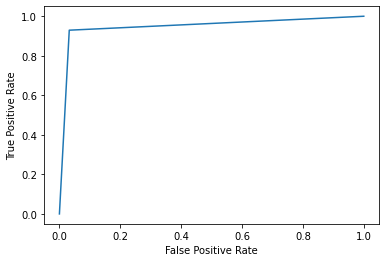

In [44]:
pyplot.plot(fpr_keras, tpr_keras)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()